In [2]:
#Importing required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets 

In [5]:
#Import the data in csv file
#1---Heart condition
#0---healthy

df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


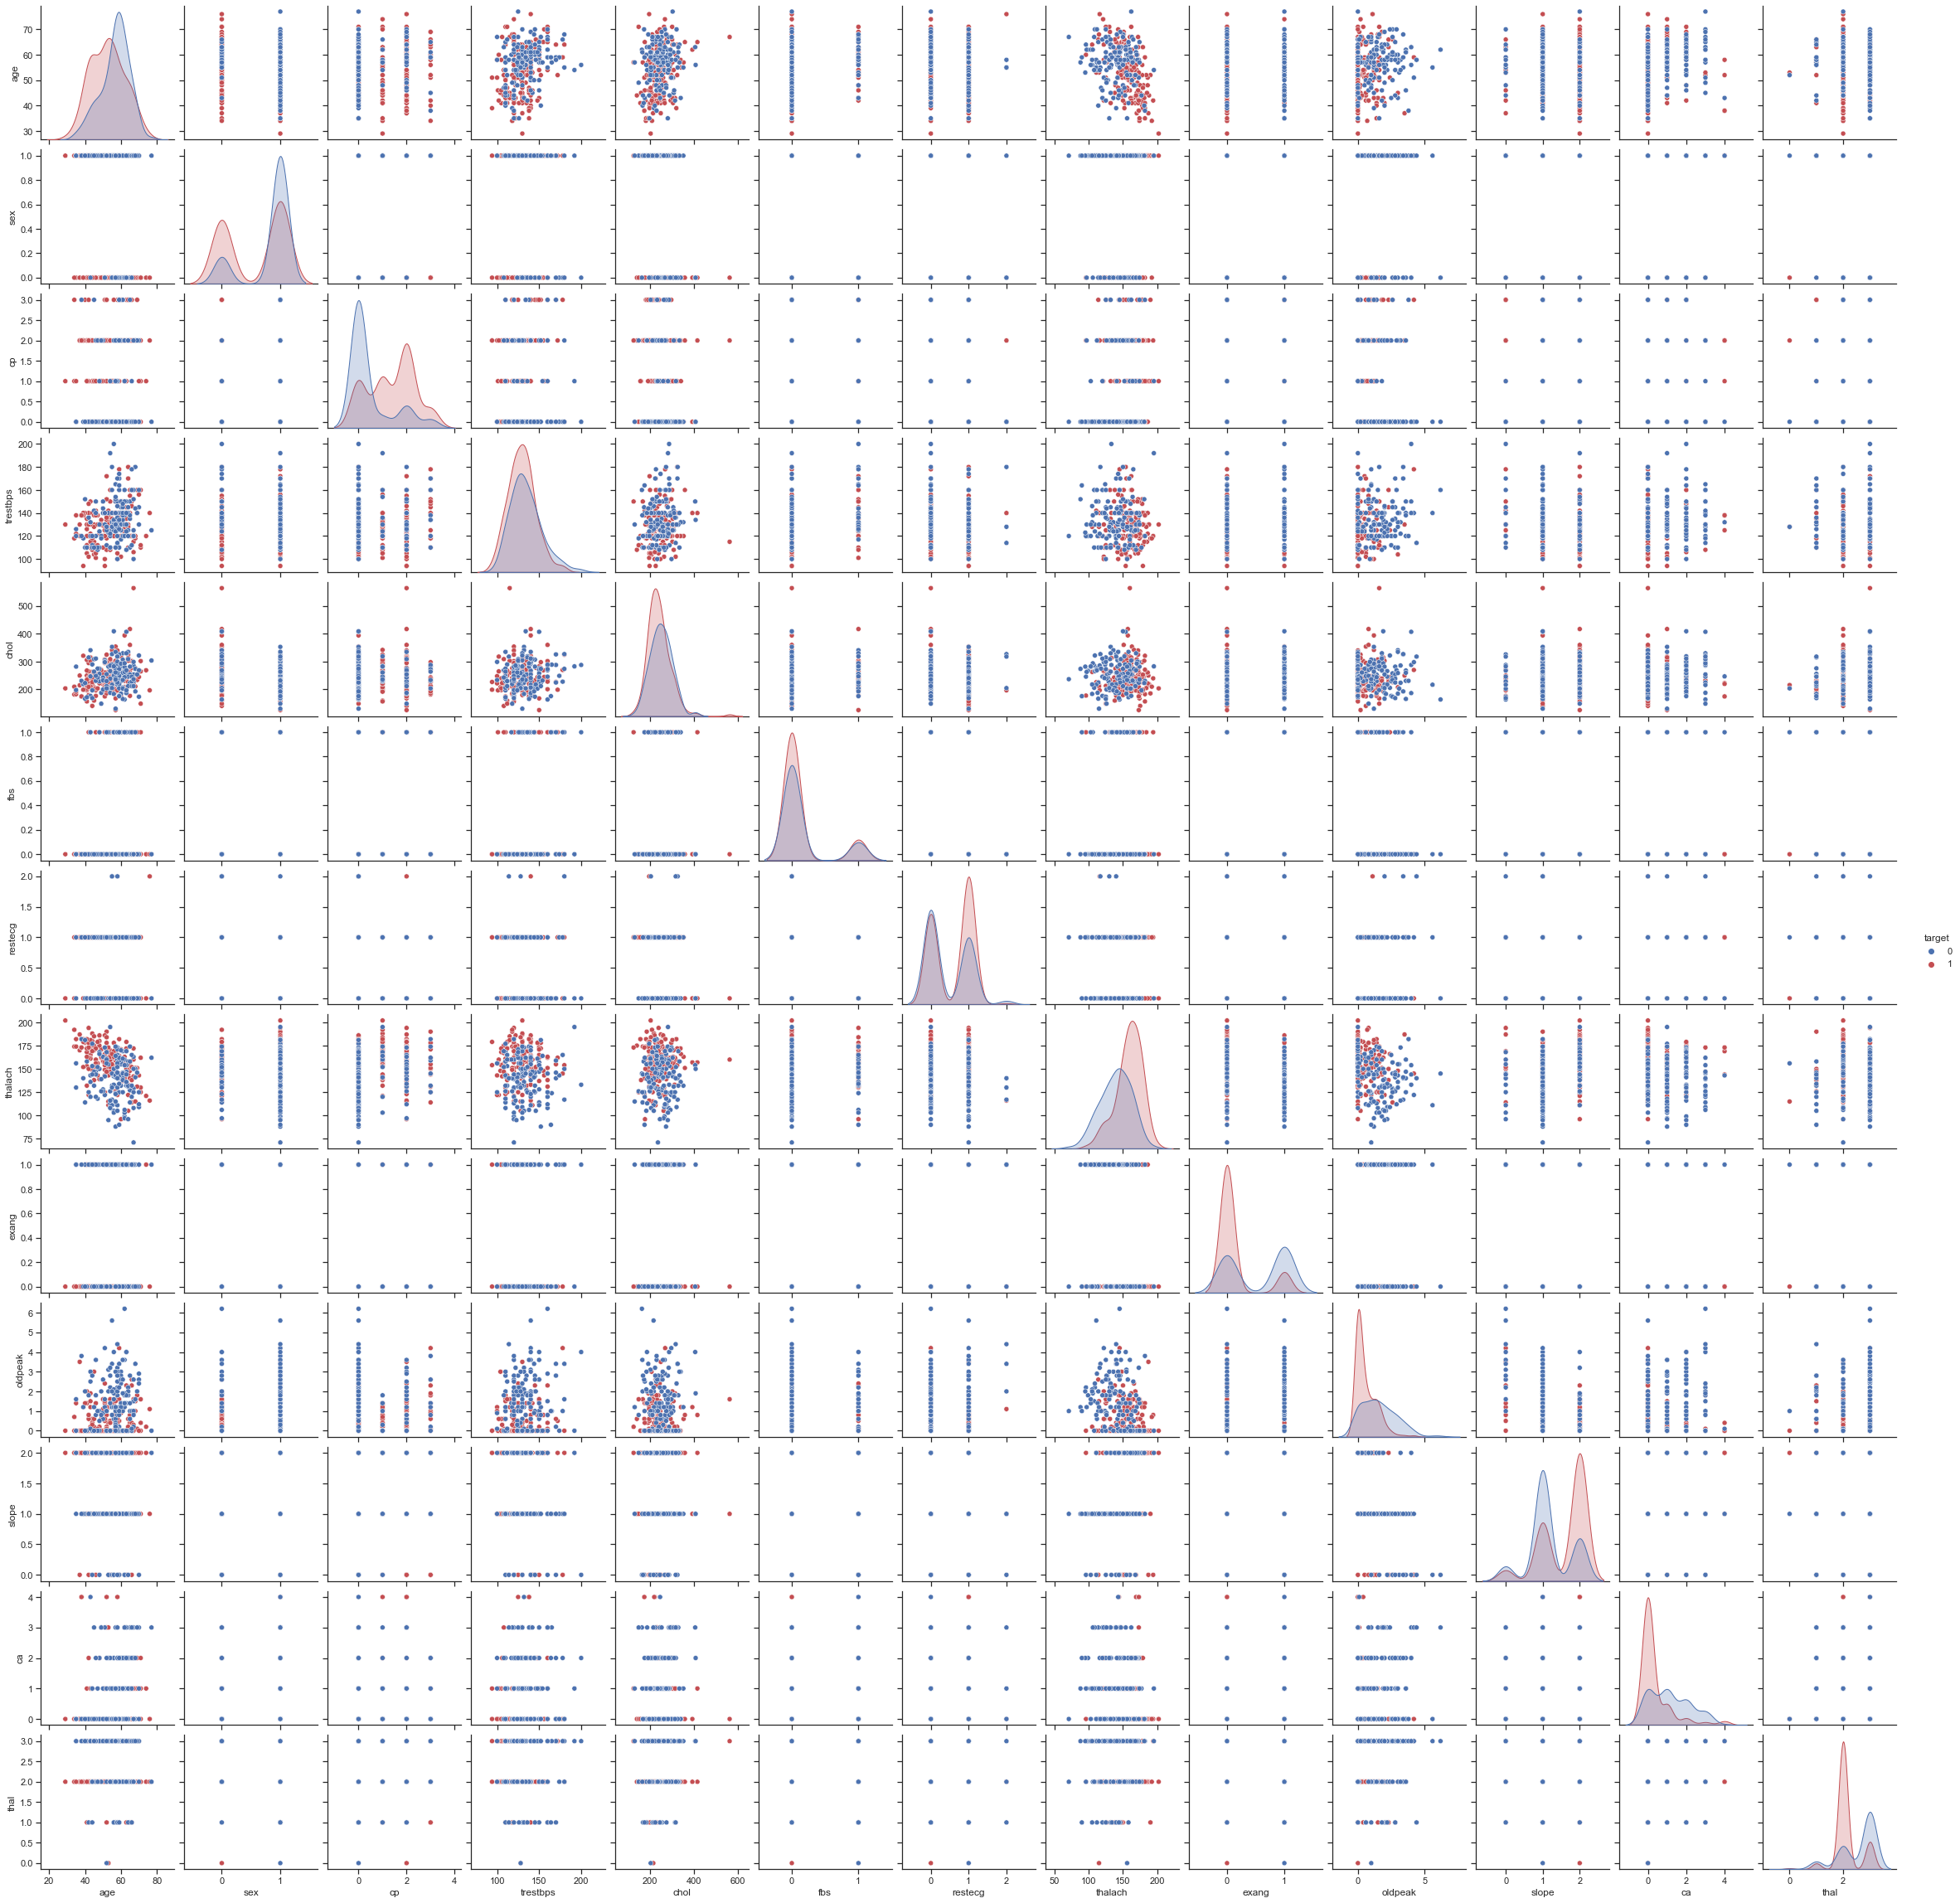

<Figure size 432x288 with 0 Axes>

In [9]:
# sns is a seaborn object

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, palette = ('b', 'r'), hue="target", height=2.5)
plt.show()
plt.savefig("figure.png")

In [3]:
#Demarcate the features and the target variable
X = df.iloc[:,0:13] #collecting all required features 
y = df.iloc[:,13:14] #collecting the target variable

In [20]:
#Segregate the training and testing data, here the size of test samples is 20% of the total samples

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [5]:
#Call a readymade Logistic Regression function and feed it with training data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

C:\Users\wasiq\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [6]:
#As now the model is trained, we can test the testing data
#We test the data by calling the fucnction defined above and feeding with X_test
#store the value of predicted y in pred_y

pred_y = model.predict(X_test)
print(pred_y)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [22]:
print('The sucess rate of the model is (%)',100*model.score(X_test, y_test))
#this gives us the idea of how well our model has performed, in other words it is (correct predictions/total predictions)x100%

The sucess rate of the model is (%) 85.24590163934425


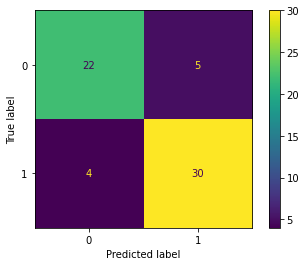

In [8]:
plot_confusion_matrix(model, X_test, y_test)
#Confusion matrix gives us the detailed information>>
            #principal diagnal--true positive(1,1),true negative(0,0)
            #other diagnal-- false positive(0,1) , false negative(1,0)


In [9]:
from sklearn.metrics import precision_score, recall_score
#call readymade library for precision_score, recall_score

pres_score=precision_score(y_test,pred_y) # precision = (TP) / (TP+FP)

recal_score=recall_score(y_test,pred_y) #recall = (TP) / (TP+FN)

print('The precision is ', pres_score)
print('The recall is ',recal_score)

The precision is  0.8571428571428571
The recall is  0.8823529411764706


**TPR/Recall/Sensitivity** is ratio of positive examples that are correctly identified.

**FPR** is the ratio of negative examples that are incorrectly classified.

**ROC(Receiver Operator Characteristic)** is nothing but the plot between TPR and FPR across all possible thresholds and **AUC (Area Under Curve)** is the entire area beneath this ROC curve.

**AUC(Area Under Curve)** measures how well a model is able to distinguish between classes.


In [10]:
from sklearn .metrics import roc_auc_score
from sklearn .metrics import roc_curve

pred_prob = model.predict_proba(X_test) 
#this gives us a m x 2 matrix, each row giving the probability of prediction
#The first element of each row is the prob that guess y=0 , while as the next element is the prob of guess y=1


# roc curve for model
#By default it takes 18 threshold values and gives us the corresponding values of fpr, tpr
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# print('prediction for x_test is ', pred_y)
#print('guess[prob y=0  prob y=1] is', pred_prob)
# print('false positive rate is ',fpr)
# print('true positive rate is', tpr)
# print('threshold is ',thresh)

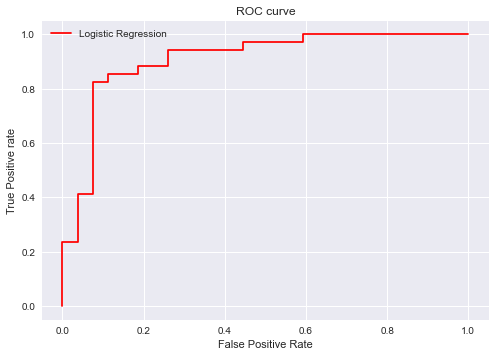

In [18]:
# matplotlib
#plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [24]:
# auc scores
auc_scor = roc_auc_score(y_test, pred_prob[:,1]) 
# pred_prob[:,1] puts into account only the prob of gues(y=1) values, as we need the prob of having a heart condition.
print('The area beneath the above ROC curve is: ',auc_scor)

The area beneath the above ROC curve is:  0.9084967320261438
